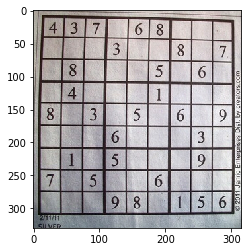

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

img = imread("resources/sudoku4.jpg")
plt.imshow(img)

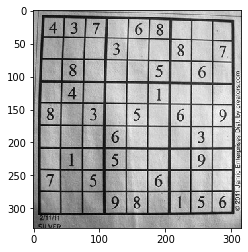

In [5]:
#convert the image to grayscale
gray_img = rgb2gray(img)
plt.imshow(gray_img, cmap="gray")

([array([  0.,   0.,   0.,  24.,  28.,  76., 128.,  74.,   0.,   0.]),
  array([ 0.,  0.,  0., 93., 53., 42., 90., 52.,  0.,  0.]),
  array([  0.,   0.,   0.,  37.,  58., 116., 104.,  15.,   0.,   0.]),
  array([  0.,   0.,   0.,  35.,  44.,  59., 174.,  18.,   0.,   0.]),
  array([  0.,   0.,   0.,  35.,  32.,  94., 148.,  21.,   0.,   0.]),
  array([  0.,   0.,   0.,  38.,  27.,  93., 165.,   7.,   0.,   0.]),
  array([  0.,   0.,   0.,  33.,  35.,  82., 171.,   9.,   0.,   0.]),
  array([  0.,   0.,  26., 131.,  36.,  25., 106.,   6.,   0.,   0.]),
  array([141.,  28.,  13.,  23.,  17.,  25.,  80.,   3.,   0.,   0.]),
  array([ 87., 118.,   9.,  20.,   8.,  21.,  67.,   0.,   0.,   0.]),
  array([147.,  90.,   7.,  15.,   7.,  23.,  41.,   0.,   0.,   0.]),
  array([ 48.,  97., 103.,  32.,   5.,  25.,  20.,   0.,   0.,   0.]),
  array([56., 44., 18., 20., 32., 73., 87.,  0.,  0.,  0.]),
  array([ 51.,  40.,  18.,  20.,  23.,  47., 105.,  26.,   0.,   0.]),
  array([ 48.,  31.,  10.,

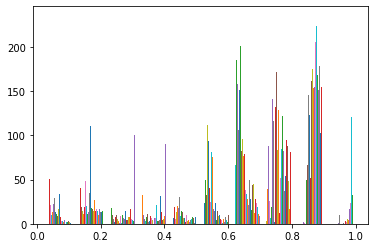

In [9]:
#generate image histogram
plt.hist(gray_img)

In [12]:
gray_img[0].shape

(316,)

In [17]:
gray_img

array([[0.60474784, 0.61620706, 0.64952902, ..., 0.77558471, 0.76382   ,
        0.77166314],
       [0.62126745, 0.63524941, 0.62823961, ..., 0.77501922, 0.74813373,
        0.73915176],
       [0.62462353, 0.65485725, 0.63886549, ..., 0.79237216, 0.75902745,
        0.75902745],
       ...,
       [0.38107059, 0.3925298 , 0.39447922, ..., 0.55723569, 0.55331412,
        0.53762784],
       [0.38804275, 0.37822745, 0.37289922, ..., 0.57292196, 0.5591851 ,
        0.53957725],
       [0.38831059, 0.38409843, 0.37960353, ..., 0.55077647, 0.53565569,
        0.51212627]])